## Problema ##

El caso promedio de complejidad temporal de la búsqueda lineal es $\mathcal{O}(\frac{n}{2})$. ¿Cómo se manifiesta este resultado cuando el algoritmo se encuentra en ejecución en una máquina? 

Puesto que el algoritmo de búsqueda lineal deja de repetir cuando se encuentra el elemento buscado, ¿indica la complejidad temporal que se puede esperar encontrar el elemento cerca del centro de la secuencia en la mayoría de los casos?


## Hipótesis ##

Si se ejecuta una gran cantidad de experimentos sobre diferentes permutaciones aleatorias de una secuencia de números, probabilísticamente se puede esperar encontrar el elemento buscado cerca del centro de la secuencia.

## Metodología ##

Se realizarán dos tipos de experimento:

* **Validación de complejidad**: experimento para validar que la complejidad temporal de la búsqueda lineal en una permutación aleatoria es $\mathcal{O}(\frac{n}{2})$.
* **Frecuencia de posiciones**: experimentos para observar cuáles son las posiciones en las que podemos encontrar al elemento más comúnmente cuando buscamos en una permutación aleatoria.



### 1. Validación de complejidad ###

#### 1.1 Verificar clase de complejidad del caso promedio ####

Se utilizará la biblioteca `big_o` para estimar la clase de complejidad temporal de la ejecución del caso promedio de la búsqueda lineal. 

Se ejecutará una prueba de `big_o` con los siguientes parámetros

* `min_n` = 10
* `max_n` = 10000
* `n_measures` = 1000
* `n_repeats` = 3
* `classes` = `[cls.Linear]`
* Función de generación de arreglos en orden aleatorio
* Búsqueda de un elemento presente en el arreglo

De acuerdo con el resultado teórico, se espera un valor de $r^2$ cercano a 1.

Adicionalmente se graficarán los resultados de tiempo de ejecución y la función de complejidad aproximada por `big_o`.

#### 1.2 Comparación con el peor caso ####

El objetivo de este experimento es comparar los tiempos de ejecución del peor caso $T_{peor}=\mathcal{O}(n)$ y del caso promedio $T_{prom}=\mathcal{O}(\frac{n}{2})$ de la búsqueda lineal.

Se ejecutará una prueba de `big_o` con los siguientes parámetros

* `min_n` = 10
* `max_n` = 10000
* `n_measures` = 1000
* `n_repeats` = 3
* `classes` = `[cls.Linear]`
* Función de generación de arreglos en orden aleatorio
* Búsqueda de un elemento no presente en el arreglo

Se tabularán los resultados de esta prueba y de la prueba anterior para compararlos. Para cada tamaño de arreglo `n` se tabulará el tiempo del peor caso, el tiempo del caso promedio y además se incluirá otra columna en la tabla que incluya el cálculo de la proporción $\frac{T_{prom}}{T_{peor}}$; este dato nos permitirá observar la relación entre los casos promedio y peor. Esta relación se graficará para observar su comportamiento.


### 2. Frecuencia de posiciones ###

Se aplicará una serie de experimentos de ejecución del algoritmo de búsqueda lineal en listas ordenadas aleatoriamente de tamaños pequeño, mediano y grande. Para cada experimento se registrará la frecuencia de las posiciones en que se encuentra el elemento buscado. El elemento buscado siempre estará en la lista.

Las listas contendrán números naturales. Las de tamaño pequeño tendrán una longitud $10$ elementos, las de longitud mediana $1000$, y las de longitud grande $10000$. El objetivo de utilizar estas categorías es observar si el tamaño del espacio de búsqueda influye de alguna manera en el comportamiento promedio de la búsqueda.

De acuerdo con la prueba de concepto desarrollada, se estima que con aproximadamente $10000$ eventos se puede observar una correspondencia con el resultado probabilístico.

Cada experimento se ejecutará sobre una permutación aleatoria de la secuencia $[0..n[$ donde $n \in \{10, 1000, 10000\}$, para cada ejecución se selecionará una permutación aleatoria nueva. Debido al propio comportamiento aleatorio, es posible que se seleccione la misma permutación más de una vez; cada permutación es equiprobable. 

Para cada experimento se registrará la frecuencia de las posiciones en las que se encuentra el elemento en cada ejecución. 

Siempre buscaremos el mismo elemento.

A continuación se detallan los parámetros para cada experimento.

| No. experimento | Tamaño lista | Repeticiones | Elemento a buscar |
| :- | :- | :- | :-: |
| 2.1 | 10 | 10000 | 3 |
| 2.2 | 1000 | 10000 | 3 |
| 2.3 | 10000 | 10000 | 3 |



**Algoritmo de búsqueda lineal**

In [23]:
def buscar(A, e):
    n = len(A)

    for i in range(n):
        if A[i] == e:
            return i
    
    return -1


**Código para los experimentos**

In [24]:
from big_o import big_o
from big_o import complexities as cls

import random
import numpy as np
import pandas as pd


random.seed(42)

In [25]:
def gen_aleatorio(n):
    arr = list(range(n))
    random.shuffle(arr)
    return arr

In [26]:
def aprox_asintotica(datos):
    ys = datos['times']
    for k, v in datos.items():
        if isinstance(k, cls.ComplexityClass):
            residual = v
            r2 = 1 - residual / (ys.size * ys.var())
            print(k, f' (r={residual}, r^2={r2})')

In [27]:
def experimento(tam_lista, elemento, reps=10000):
    pos = []
    for i in range(reps):
        A = list(range(tam_lista))
        random.shuffle(A)
        pos.append(buscar(A, elemento))
    
    return pos

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot(etiqueta_xs, xs, etiqueta_ys, ys):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(xs, ys)
    plt.ylabel(etiqueta_ys)
    plt.xlabel(etiqueta_xs)
    plt.show()

def plot_hist(etiqueta_xs, etiqueta_ys, ys):
    fig, ax = plt.subplots()
    ax.hist(ys, bins=10)
    plt.xlabel(etiqueta_xs)
    plt.ylabel(etiqueta_ys)
    plt.show()

## Resultados ##

### Experimento 1.1 ###

In [29]:
clase, datos = big_o(lambda A: buscar(A, 3), 
                     gen_aleatorio,
                     min_n=10, max_n=10000,
                     n_measures=1000, n_repeats=3,
                     verbose=False, return_raw_data=True,
                     classes=[cls.Linear])

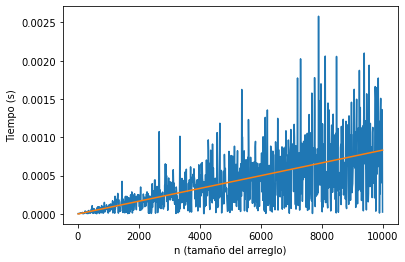

In [30]:
prom_xs = datos['measures']
prom_ys = datos['times']
prom_aprox_ys = clase.compute(prom_xs)

plt.plot(prom_xs, prom_ys)
plt.plot(prom_xs, prom_aprox_ys, label = 'aprox')
plt.ylabel('Tiempo (s)')
plt.xlabel('n (tamaño del arreglo)')
plt.show()

In [31]:
aprox_asintotica(datos)

Linear: time = -5.6E-07 + 8.3E-08*n (sec)  (r=9.385127584713217e-05, r^2=0.38117313476543735)


### Experimento 1.2 ###

In [32]:
clase, datos = big_o(lambda A: buscar(A, -1), 
                     gen_aleatorio,
                     min_n=10, max_n=10000,
                     n_measures=1000, n_repeats=3,
                     verbose=False, return_raw_data=True,
                     classes=[cls.Linear])

In [33]:
aprox_asintotica(datos)

Linear: time = -2.5E-06 + 1.7E-07*n (sec)  (r=7.328069607080437e-05, r^2=0.7676126842485324)


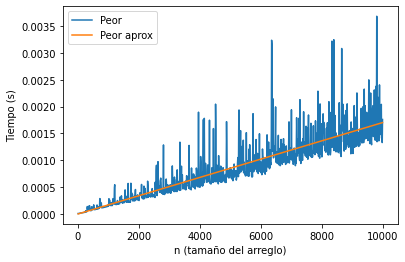

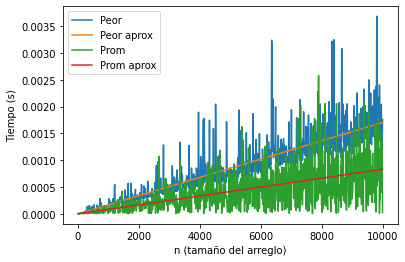

In [34]:
peor_xs = datos['measures']
peor_ys = datos['times']
peor_aprox_ys = clase.compute(peor_xs)

## peor caso
plt.plot(peor_xs, peor_ys, label = 'Peor')
plt.plot(peor_xs, peor_aprox_ys, label = 'Peor aprox')
plt.ylabel('Tiempo (s)')
plt.xlabel('n (tamaño del arreglo)')
plt.legend(loc = 2)
plt.show()

## comparación entre casos peor y promedio
plt.plot(peor_xs, peor_ys, label = 'Peor')
plt.plot(peor_xs, peor_aprox_ys, label = 'Peor aprox')
plt.plot(prom_xs, prom_ys, label = 'Prom')
plt.plot(prom_xs, prom_aprox_ys, label = 'Prom aprox')
plt.ylabel('Tiempo (s)')
plt.xlabel('n (tamaño del arreglo)')
plt.legend(loc = 2)
plt.show()

In [35]:
df = pd.DataFrame({
    'n': peor_xs,
    'peor': peor_aprox_ys,
    'prom': prom_aprox_ys
})

df['prop'] = df['prom'] / df['peor']

In [36]:
display(df)

,n,peor,prom,prop
0,10,-8.402450e-07,2.720164e-07,-0.323735
1,20,8.640725e-07,1.104906e-06,1.278719
2,30,2.568390e-06,1.937796e-06,0.754479
3,40,4.272707e-06,2.770686e-06,0.648461
4,50,5.977025e-06,3.603575e-06,0.602905
...,...,...,...,...
995,9960,1.694956e-03,8.289973e-04,0.489097
996,9970,1.696660e-03,8.298302e-04,0.489096
997,9980,1.698364e-03,8.306630e-04,0.489096
998,9990,1.700069e-03,8.314959e-04,0.489096


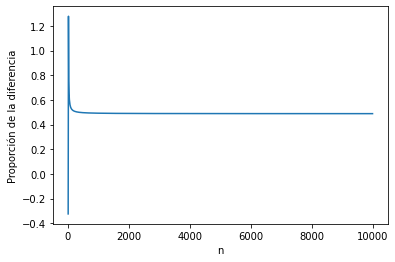

In [37]:
xs = df['n']
ys = df['prop']

plt.plot(xs, ys)
plt.ylabel('Proporción de la diferencia')
plt.xlabel('n')
plt.show()

### Experimento 2.1 ###

In [38]:
tam_lista = 10
elemento = 3

pos = experimento(tam_lista, elemento)

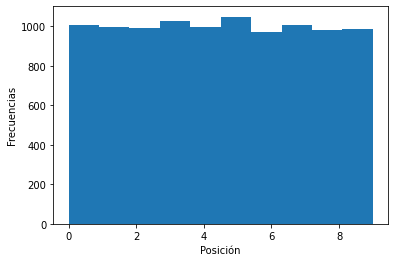

In [39]:
plot_hist('Posición', 'Frecuencias', pos)

### Experimento 2.2 ###

In [40]:
tam_lista = 1000
elemento = 3

pos = experimento(tam_lista, elemento)

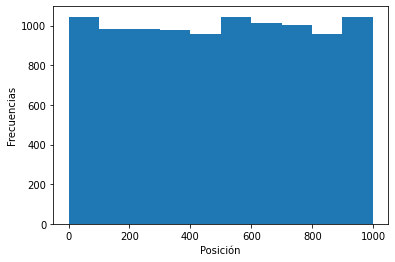

In [41]:
plot_hist('Posición', 'Frecuencias', pos)

### Experimento 2.3 ###

In [42]:
tam_lista = 10000
elemento = 3

pos = experimento(tam_lista, elemento)

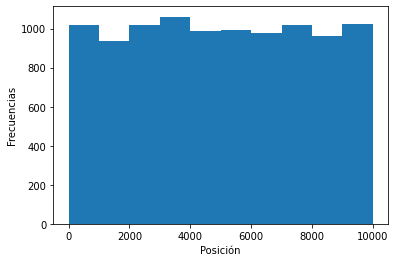

In [43]:
plot_hist('Posición', 'Frecuencias', pos)

## Análisis de Resultados ##

Los histogramas resultado de los experimentos 2.1, 2.2 y 2.3 muestran una distribución uniforme de las frecuencias de las posiciones en las que encontramos al elemento en cada ejecución del algoritmo, independientemente de que estemos trabajando con listas de tamaño pequeño ($|10|$), mediano ($|1000|$) o grande ($|10000|$). De esta forma, el elemento buscado puede encontrarse, en el caso promedio, en cualquier posición del arreglo.

Este comportamiento se puede explicar considerando que estamos trabajando con permutaciones aleatorias de forma que cada permutación es equiprobable; por tanto, para cualquier permutación aleatoria de la secuencia de números el elemento buscado puede estar en cualquier posición con la misma probabilidad.

Con respecto a la complejidad temporal del algoritmo de búsqueda lineal, los resultados del experimento 1.1 proveen datos no concluyentes sobre el resultado teórico. 

El gráfico de la función de tiempo de ejecución del caso promedio muestra una tendencia de crecimiento aparentemente lineal. Sin embargo, la aproximación de `big_o` produce un valor de $r^2 < 0.5$, por tanto no se puede afirmar con confiabilidad que la función de tiempo de ejecución es linear.

El gráfico y prueba de `big_o` para el peor caso del algoritmo en el experimento 1.2 presenta evidencia confiable que confirma la complejidad temporal lineal $\mathcal{O}(n)$ con un valor $r^2 > 0.7$.

También se observa que el gráfico para el peor caso presenta menos ruido que el gráfico para el caso promedio. Esto podría deberse al hecho de que en el caso promedio el número de repeticiones será cualquier número en el rango $[1..n]$ con igual probabilidad, mientras que en el peor caso el número de repeticiones siempre será $n$. Debido a esto, en el caso promedio, para un $n$ cualquiera se puede esperar un tiempo más bajo que la función aproximada —en los casos en que el elemento buscado está al principio de la lista— o un tiempo más alto que la función aproximada —en los casos cuando elemento buscado está al final de la lista—. 

En el gráfico de comparación del comportamiento temporal de ambos casos se observa que el peor caso consistentemente toma más tiempo en ejecutarse que el caso promedio. Esta diferencia aumenta conforme aumenta el tamaño de la entrada.

El gráfico de la proporción de la diferencia entre el caso promedio y el peor caso muestra un crecimiento logarítmico que se estabiliza pronto cerca de $0.5$. Este es un resultado consistente con la complejidad temporal del caso promedio $\mathcal{O}(\frac{n}{2})$ comparada con la del peor caso $\mathcal{O}(n)$.

## Conclusiones ##

Con base en el análisis de los resultados de los experimentos se rechaza la hipótesis que propone interpretar el caso promedio de la búsqueda lineal como la expectativa de encontrar el elemento buscado cerca del centro de la secuencia.

En realidad en el caso promedio la expectativa es encontrar al elemento buscado en cualquier posición de la secuencia con igual probabilidad.

La evidencia obtenida con el experimento 1.2 permite proponer una mejor interpretación del resultado teórico de la complejidad temporal del algoritmo $T(n) = \mathcal{O}(\frac{n}{2})$ que la propuesta por la hipótesis. Este resultado indica que se puede esperar que el tiempo de ejecución del caso promedio sea en promedio $50\%$ menor que el tiempo de ejecución del peor caso. En otras palabras, los casos en que el tiempo es bajo cuando se encuentra el elemento cerca del principio de la lista se equilibran con los casos en que el tiempo es alto cuando se encuentra al elemento cerca del final de la lista, pues ambas situaciones pueden suceder con igual probabilidad.